In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Dropout,LSTM
from keras.callbacks import EarlyStopping

In [2]:
df=pd.read_csv(r"C:\Users\kumar\Downloads\Data_set\AAPL.csv")

In [3]:
df.head()
df.shape

(10468, 7)

In [4]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       10468 non-null  object 
 1   Open       10468 non-null  float64
 2   High       10468 non-null  float64
 3   Low        10468 non-null  float64
 4   Close      10468 non-null  float64
 5   Adj Close  10468 non-null  float64
 6   Volume     10468 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 572.6+ KB


In [6]:
df['Date']=pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       10468 non-null  datetime64[ns]
 1   Open       10468 non-null  float64       
 2   High       10468 non-null  float64       
 3   Low        10468 non-null  float64       
 4   Close      10468 non-null  float64       
 5   Adj Close  10468 non-null  float64       
 6   Volume     10468 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 572.6 KB


In [8]:
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [9]:
df.sort_index(inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [10]:
print("Number of non-positive values:", (df['Volume'] <= 0).sum())

Number of non-positive values: 1


In [11]:
df = df[df['Volume'] > 0]
df.shape

(10467, 6)

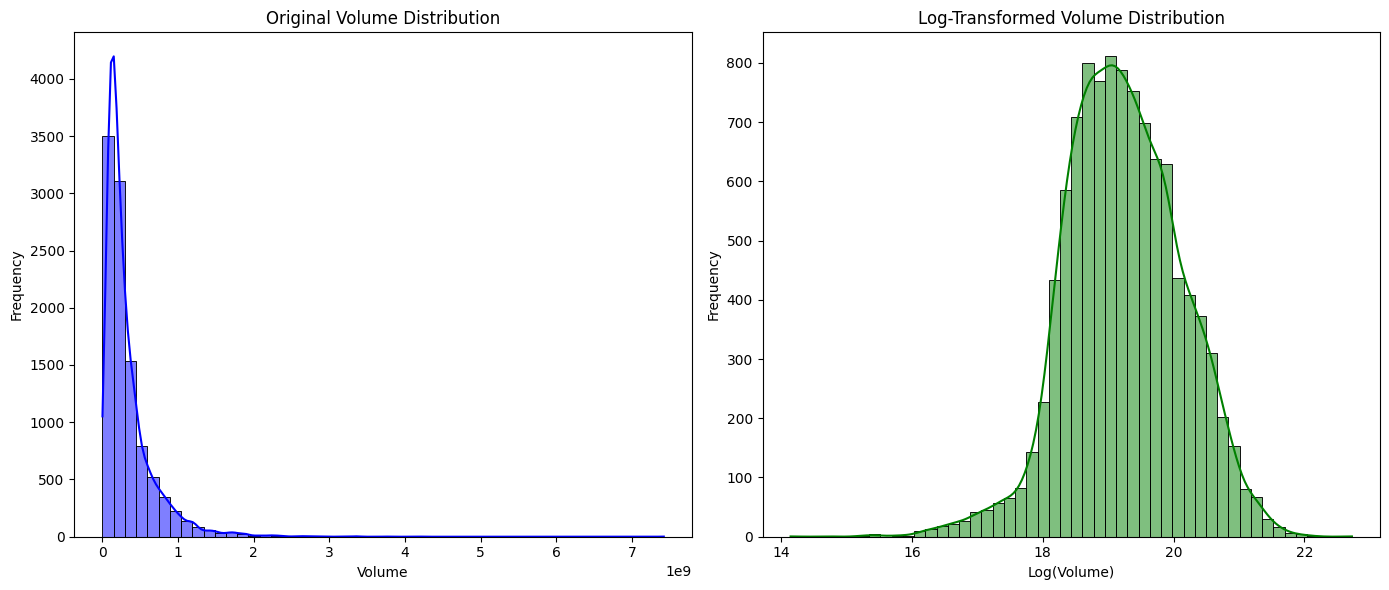

In [12]:
df['Log_Volume'] = np.log(df['Volume'])

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Volume'], bins=50, kde=True, color='blue')
plt.title('Original Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df['Log_Volume'], bins=50, kde=True, color='green')
plt.title('Log-Transformed Volume Distribution')
plt.xlabel('Log(Volume)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [13]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,Log_Volume
Date,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600,19.966185
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800,18.985340
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000,18.476380
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600,18.274980
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600,18.112110


In [14]:
df.drop(columns = ['Volume'], inplace = True)
df.sample()

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
2007-10-19,6.222857,6.236786,6.071429,6.086429,5.204005,20.979287


In [15]:
scaler=MinMaxScaler()
scaled_df=scaler.fit_transform(df[df.columns])

In [16]:
scaled_df

array([[4.30950014e-04, 4.33270567e-04, 4.42511906e-04, 4.35483696e-04,
        3.40815838e-04, 6.78288373e-01],
       [3.97331936e-04, 3.96658463e-04, 4.05118893e-04, 3.98684579e-04,
        3.12018225e-04, 5.64020236e-01],
       [3.48427437e-04, 3.47836857e-04, 3.55255959e-04, 3.49613594e-04,
        2.73615897e-04, 5.04726625e-01],
       ...,
       [7.35239774e-01, 7.50670228e-01, 7.37757535e-01, 7.44010911e-01,
        7.46069029e-01, 4.87930845e-01],
       [7.23135563e-01, 7.23604845e-01, 7.20334206e-01, 7.14499102e-01,
        7.16477939e-01, 5.07337154e-01],
       [7.12126738e-01, 7.27377614e-01, 7.24634207e-01, 7.22742631e-01,
        7.24743614e-01, 5.32436535e-01]])

In [17]:
apple_df=pd.DataFrame(scaled_df,columns=df.columns,index=df.index)

In [18]:
apple_df

,Open,High,Low,Close,Adj Close,Log_Volume
Date,,,,,,
1980-12-12,0.000431,0.000433,0.000443,0.000435,0.000341,0.678288
1980-12-15,0.000397,0.000397,0.000405,0.000399,0.000312,0.564020
1980-12-16,0.000348,0.000348,0.000355,0.000350,0.000274,0.504727
1980-12-17,0.000361,0.000363,0.000371,0.000365,0.000286,0.481264
1980-12-18,0.000379,0.000381,0.000390,0.000383,0.000300,0.462289
...,...,...,...,...,...,...
2022-06-13,0.727462,0.738969,0.733737,0.724501,0.726507,0.521601
2022-06-14,0.728886,0.731806,0.733960,0.729337,0.731356,0.479008
2022-06-15,0.735240,0.750670,0.737758,0.744011,0.746069,0.487931


In [19]:
apple_df=apple_df.tail(200)

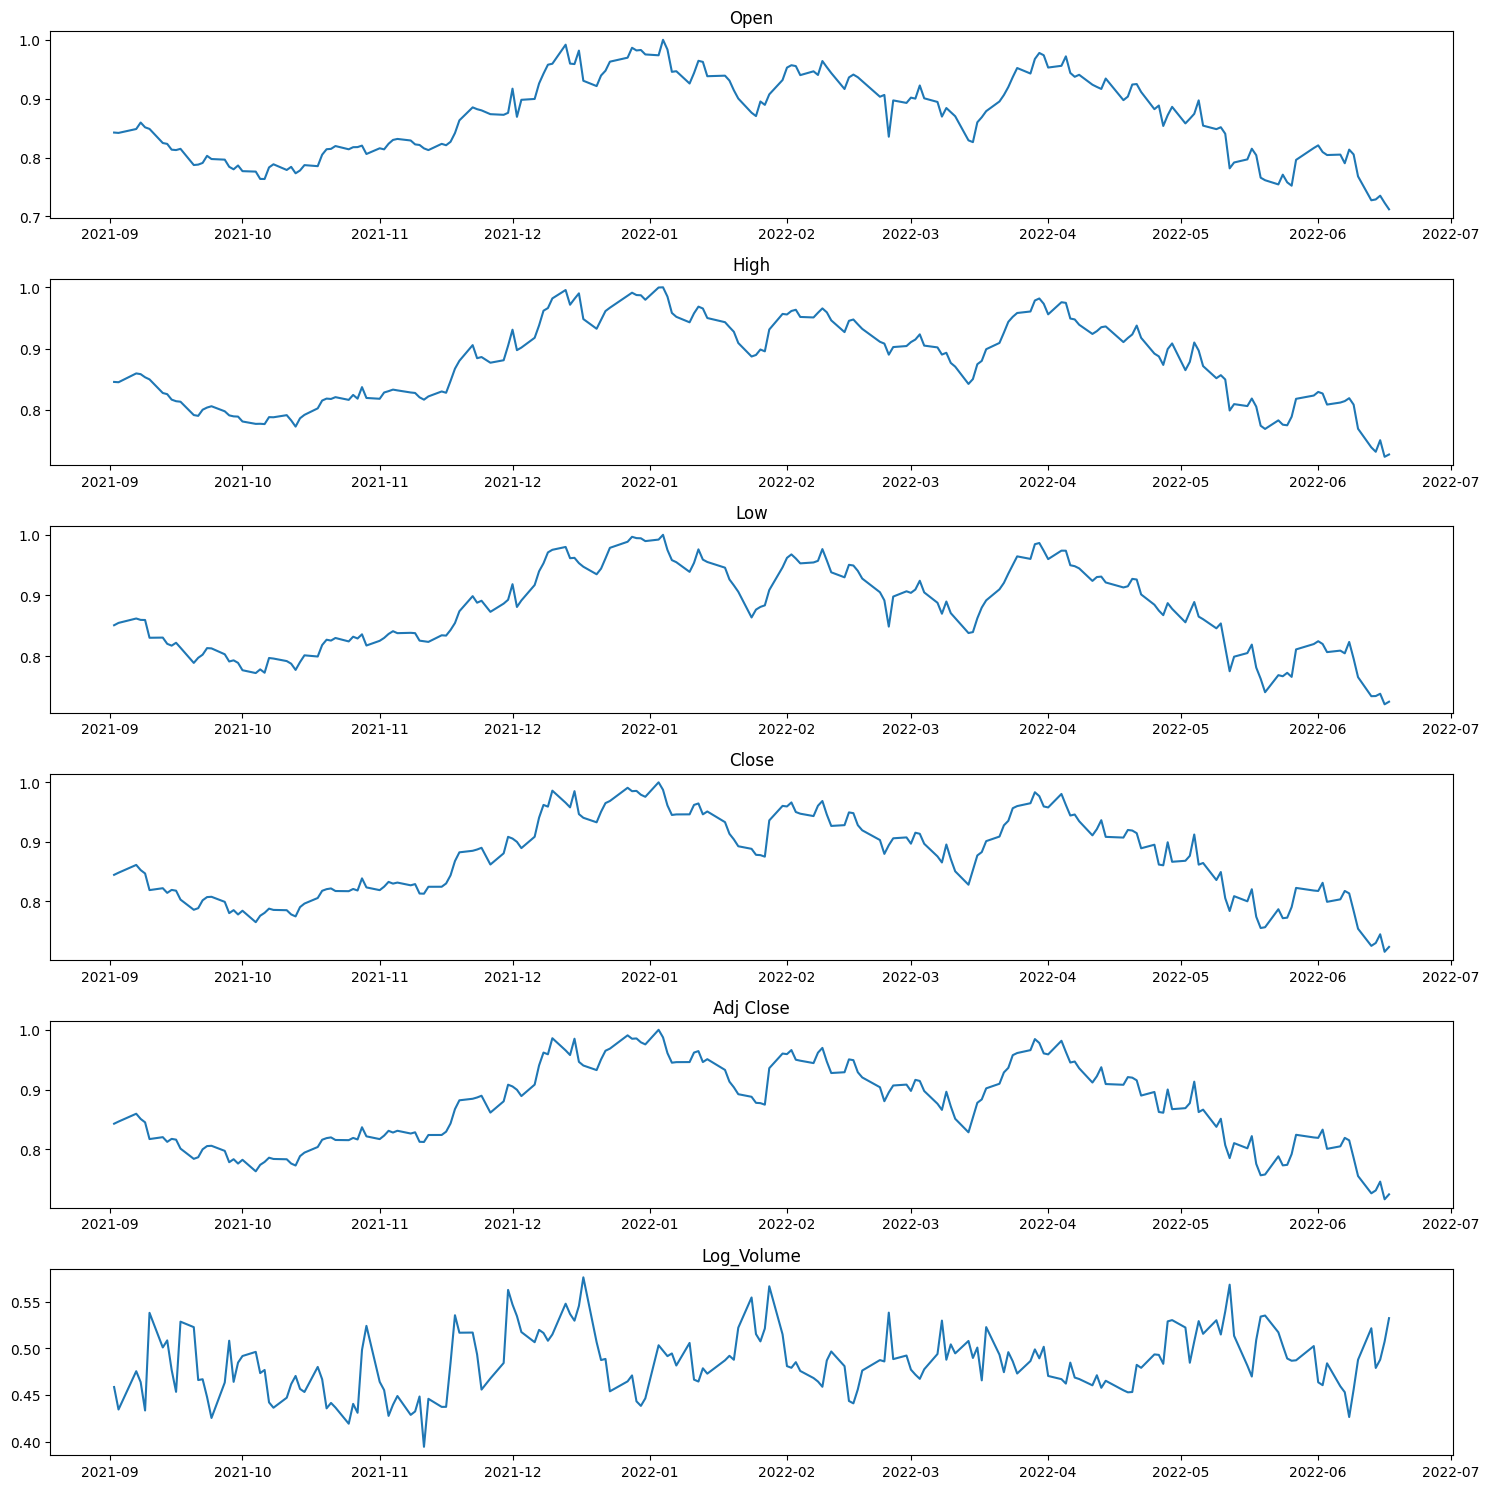

In [20]:
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)

for ax, col in zip(axes, apple_df.columns):
  ax.plot(apple_df[col])
  ax.set_title(col)
  
plt.tight_layout()  

In [21]:
def create_sequence(data,window_size):
    X=[]
    y=[]
    for i in range(window_size,len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

In [23]:
X,y = create_sequence(apple_df,50)

In [24]:
print(X.shape)
print(y.shape)

(150, 50, 6)
(150, 6)


In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [26]:
model=Sequential()
model.add(LSTM(units = 50, return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 50, return_sequences=False))
model.add(Dropout(0.4))

model.add(Dense(y_train.shape[1]))
model.add(Dropout(0.4))

model.add(Dense(y_train.shape[1]))
model.add(Dropout(0.4))

C:\Users\kumar\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
model.compile(optimizer='adam',loss='mean_squared_error',metrics=['RootMeanSquaredError'])

In [28]:
early_stopping = EarlyStopping(monitor='val_loss',
                               patience=5,
                               verbose=1,
                               restore_best_weights=True)

In [29]:
history = model.fit(X_train, y_train,
                    validation_split = 0.2,
                    epochs=100,
                    batch_size=10,
                    callbacks=[early_stopping])

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 19s 424ms/step - RootMeanSquaredError: 0.7241 - loss: 0.5257 - val_RootMeanSquaredError: 0.4756 - val_loss: 0.2262
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - RootMeanSquaredError: 0.6617 - loss: 0.4380 - val_RootMeanSquaredError: 0.5031 - val_loss: 0.2532
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - RootMeanSquaredError: 0.6263 - loss: 0.3928 - val_RootMeanSquaredError: 0.4292 - val_loss: 0.1842
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - RootMeanSquaredError: 0.6029 - loss: 0.3636 - val_RootMeanSquaredError: 0.4518 - val_loss: 0.2041
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - RootMeanSquaredError: 0.6287 - loss: 0.3954 - val_RootMeanSquaredError: 0.4493 - val_loss: 0.2018
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - RootMeanSquaredError: 0.6228 - loss: 0.3880 - val_RootMeanSquaredError: 0.4485 - val_loss: 0.2011
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - RootMeanSquaredError: 0.6080

In [30]:
predictions=model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   


In [31]:
predictions=scaler.inverse_transform(predictions)
y_test_rescaled=scaler.inverse_transform(y_test)

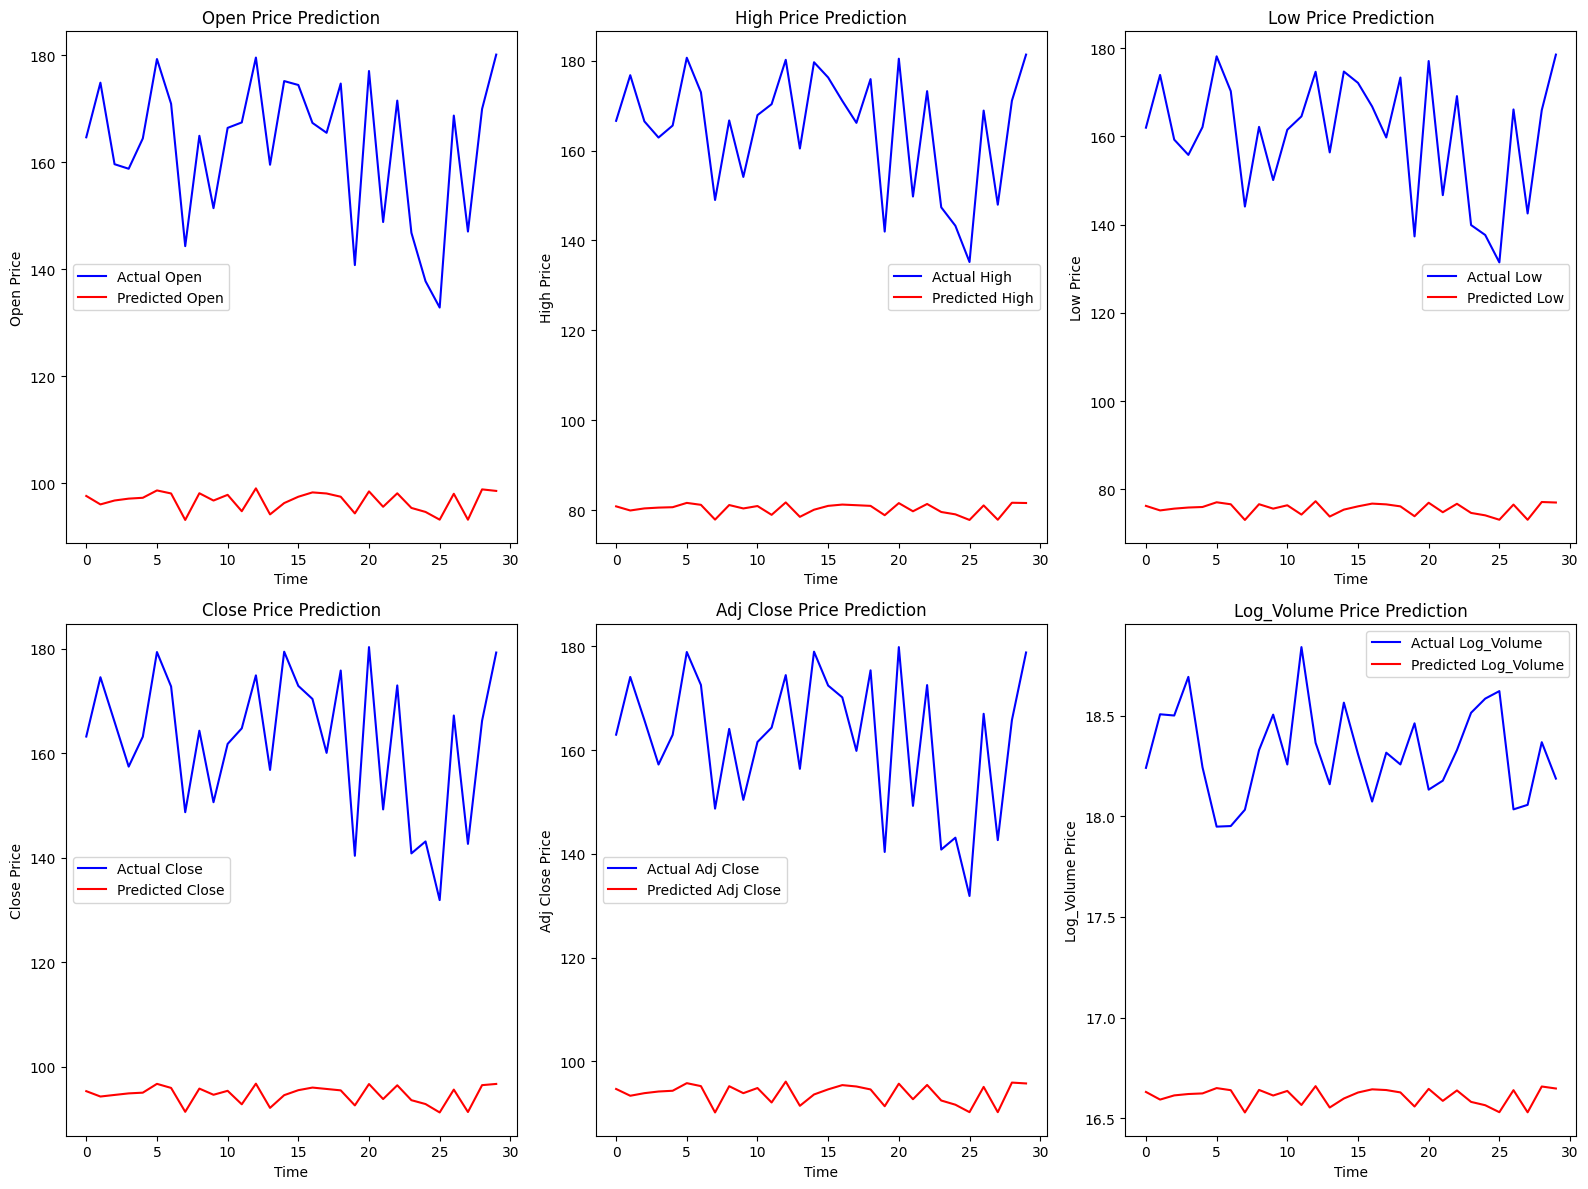

In [32]:
plt.figure(figsize=(16,12))
for i, col in enumerate(apple_df.columns):
    plt.subplot(2,3,i+1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Price Prediction')
    plt.xlabel('Time')
    plt.ylabel(f'{col} Price')
    plt.legend()
plt.tight_layout()